### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ks_2samp

from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor

set_config(print_changed_only=False)
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas 
pd.set_option('display.width', None)        # Ajusta el ancho al tamaño de la pantalla
pd.set_option('display.max_colwidth', None) # Muestra el contenido completo de cada celda

### Cargamos bases de datos

In [4]:
full = pd.read_csv('/Users/hacanaval/MEGA/MEGAsync/Academico/Tripleten - Data Science 2025/Sprint 12/data/gold_recovery_full.csv')
test = pd.read_csv('/Users/hacanaval/MEGA/MEGAsync/Academico/Tripleten - Data Science 2025/Sprint 12/data/gold_recovery_test.csv')
train = pd.read_csv('/Users/hacanaval/MEGA/MEGAsync/Academico/Tripleten - Data Science 2025/Sprint 12/data/gold_recovery_train.csv')


### Revisamos duplicados


In [6]:
print('Duplicados full \n', full.duplicated().sum())
print('\n Duplicados test \n', test.duplicated().sum())
print('\n Duplicados train \n', train.duplicated().sum())

Duplicados full 
 0

 Duplicados test 
 0

 Duplicados train 
 0


### Limpiamos filas con valores ausentes

Para este caso, dado que las tres bases de datos contienen numerosas columnas, se decidió limpiar las filas, ya que la mayoría presentan valores ausentes.

Cabe aclarar que, después de la limpieza, el dataframe total quedó con más de 16,000 observaciones, siendo un dataset robusto. Asimismo, el dataset de entrenamiento (train) quedó con 5,383 observaciones, mientras que el de prueba (test) quedó con 11,017 observaciones.

In [8]:
print('Ausentes full \n', full.isna().sum().sort_values(ascending=False).head(10))
full = full.dropna()

Ausentes full 
 rougher.output.recovery               3119
rougher.output.tail_ag                2737
rougher.output.tail_au                2736
rougher.output.tail_sol               2736
rougher.input.floatbank11_xanthate    2257
secondary_cleaner.output.tail_sol     2215
final.output.recovery                 1963
rougher.calculation.au_pb_ratio       1627
primary_cleaner.input.sulfate         1609
primary_cleaner.input.depressant      1546
dtype: int64


In [9]:
print('\n Ausentes test \n', test.isna().sum().sort_values(ascending=False).head(10))
test = test.dropna()


 Ausentes test 
 rougher.input.floatbank11_xanthate          353
primary_cleaner.input.sulfate               302
primary_cleaner.input.depressant            284
rougher.input.floatbank10_sulfate           257
primary_cleaner.input.xanthate              166
rougher.input.floatbank10_xanthate          123
rougher.input.feed_sol                       67
rougher.input.floatbank11_sulfate            55
rougher.input.feed_rate                      40
secondary_cleaner.state.floatbank3_a_air     34
dtype: int64


In [10]:
print('\n Ausentes train \n', train.isna().sum().sort_values(ascending=False).head(10))
train = train.dropna()


 Ausentes train 
 rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64


### Realizamos estadistica descriptiva

In [12]:
print('Info full \n', full.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16094 non-null  object 
 1   final.output.concentrate_ag                         16094 non-null  float64
 2   final.output.concentrate_pb                         16094 non-null  float64
 3   final.output.concentrate_sol                        16094 non-null  float64
 4   final.output.concentrate_au                         16094 non-null  float64
 5   final.output.recovery                               16094 non-null  float64
 6   final.output.tail_ag                                16094 non-null  float64
 7   final.output.tail_pb                                16094 non-null  float64
 8   final.output.tail_sol                               16094 non-null  float64
 9   

In [13]:
print('Info test \n', test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5383 non-null   object 
 1   primary_cleaner.input.sulfate               5383 non-null   float64
 2   primary_cleaner.input.depressant            5383 non-null   float64
 3   primary_cleaner.input.feed_size             5383 non-null   float64
 4   primary_cleaner.input.xanthate              5383 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5383 non-null   float64
 10  primary_cleaner.s

In [14]:
print('Info train \n', train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11017 non-null  object 
 1   final.output.concentrate_ag                         11017 non-null  float64
 2   final.output.concentrate_pb                         11017 non-null  float64
 3   final.output.concentrate_sol                        11017 non-null  float64
 4   final.output.concentrate_au                         11017 non-null  float64
 5   final.output.recovery                               11017 non-null  float64
 6   final.output.tail_ag                                11017 non-null  float64
 7   final.output.tail_pb                                11017 non-null  float64
 8   final.output.tail_sol                               11017 non-null  float64
 9   

In [15]:
print(full.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16094.000000                 16094.000000   
mean                      5.190976                     9.997593   
std                       1.333257                     1.568785   
min                       0.000000                     0.000000   
25%                       4.277722                     9.103183   
50%                       5.083578                    10.092386   
75%                       5.894149                    11.030644   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16094.000000                 16094.000000   
mean                       9.871835                    44.307437   
std                        2.754533                     4.210135   
min                        0.000000                     0.000000   
25%                        8.156531                    4

In [16]:
print(test.describe())

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5383.000000                       5383.000000   
mean                      174.684002                          8.686188   
std                        43.357021                          3.066237   
min                         0.010815                          0.001796   
25%                       146.940315                          6.487368   
50%                       177.828891                          8.049222   
75%                       208.247759                         10.033541   
max                       265.983123                         20.046764   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5383.000000                     5383.000000   
mean                          7.268670                        1.383277   
std                           0.610441                        0.644139   
min                           5.65000

In [17]:
print(train.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 11017.000000                 11017.000000   
mean                      5.156333                    10.172687   
std                       1.340491                     1.589666   
min                       0.000000                     0.000000   
25%                       4.231103                     9.279625   
50%                       4.999314                    10.347530   
75%                       5.852710                    11.187018   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  11017.000000                 11017.000000   
mean                       9.600570                    44.131636   
std                        2.842305                     4.171270   
min                        0.000000                     0.000000   
25%                        7.951464                    4

### 1.2 Comprobamos que el cálculo de la recuperación sea correcto

Debemos verificar si los valores de la columna rougher.output.recovery en el dataset train son correctos. Para esto debemos extraer los valores necesarios para la formula de recuperación 

- C: Proporción de oro en el concentrado después de la flotación (rougher.output.concentrate_au)
- F: Proporción de oro en la alimentación antes de la flotación (rougher.input.feed_au)
- T: Proporción de oro en las colas después de la flotación (rougher.output.tail_au)


In [19]:
# Extraemos las columnas necesarias
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

# Calculamos la recuperación usando la fórmula
train['calculated_recovery'] = (C * (F - T)) / (F * (C - T)) * 100

# Nos aseguramos de que no haya divisiones por cero o valores NaN
train = train.dropna(subset=['calculated_recovery'])

# Comparamos con los valores reales
real_recovery = train['rougher.output.recovery']
calculated_recovery = train['calculated_recovery']

# Calculamos el EAM (MAE)
mae = mean_absolute_error(real_recovery, calculated_recovery)

# Mostrar el resultado
print(f"El EAM entre los valores calculados y reales es: {mae}")

El EAM entre los valores calculados y reales es: 9.32825166439703e-15


Como se observa, el EAM es un valor cercano a 0, por ende podemos afirmar que la formula de recuperación está bien aplicada

### 1.3 Analizamos las características no disponibles en el conjunto de prueba



In [22]:
missing_in_test = set(train.columns) - set(test.columns)
print("Columnas en train pero no en test:", missing_in_test)

Columnas en train pero no en test: {'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.tail_pb', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_ag', 'final.output.tail_pb', 'final.output.concentrate_sol', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'final.output.tail_au', 'rougher.output.concentrate_pb', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_pb', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.tail_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_au', 'rougher.output.recovery', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'final.output.recovery', 'secondary_cleaner.output.tail_pb', 'final.output.tail_ag', 'calculated_recovery', 'rougher.output.tail

Si comparamos los datasets de entrenamiento y prueba, tenemos 34 columnas que no están presente en el conjunto de prueba. Estas 34 columnas corresponden a los parametros de **_output_** 

Estas columnas no están en test porque son las variables objetivo o resultados intermedios que se deben predecir

- final.output.* (concentrados y colas finales)
- primary_cleaner.output.* (concentrados y colas de la limpieza primaria)
- rougher.output.* (concentrados, colas y recuperación del proceso rougher)
- secondary_cleaner.output.* (colas de la limpieza secundaria)
- rougher.calculation.* (resultado intermedio)

Como lo vimos anteriormente, todas las columnas son tipo float (excluyendo la columna date)

### 1.4 Preprocesamiento de los datos

1. Vamos a pasar la columna date de objecta tipo datetime
2. Con describe observamos que las columnas tienen diferentes escalas. Para esto deberiamos estandarizar. Sin embargo, lo haremos justo antes de correr el modelo. Esto porque necesito los datos en su forma original para analizar concentraciones y distribuciones
3. Vamos a revisar correlaciones altas con la matriz de correlación. Si hay variables con una correlación cercana a 1, se elimina una de las dos columnas para evitar multicolinealidad, redundancia, sobreajuste, entre otros

In [25]:
# Convertimos la columna 'date' a tipo datetime en train y test
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [26]:
# Realizamos matriz de correlación

# Excluir las columnas no deseadas al ser columnas objetivo y date
features_train = train.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery', 'calculated_recovery'])
correlation_matrix = features_train.corr()

# Filtramos correlaciones altas (> 0.9) excluyendo las correlaciones de una variable consigo misma (que siempre son 1)
high_corr = correlation_matrix[(correlation_matrix.abs() > 0.9) & (correlation_matrix != 1.0)]

# Mostrar solo los pares con correlaciones altas
print("Pares con correlación alta (> 0.9):")
print(high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))

Pares con correlación alta (> 0.9):
                                                    primary_cleaner.output.tail_ag  \
primary_cleaner.output.tail_ag                                                 NaN   
primary_cleaner.output.tail_pb                                            0.946852   
primary_cleaner.state.floatbank8_a_air                                         NaN   
primary_cleaner.state.floatbank8_a_level                                       NaN   
primary_cleaner.state.floatbank8_b_air                                         NaN   
primary_cleaner.state.floatbank8_b_level                                       NaN   
primary_cleaner.state.floatbank8_c_air                                         NaN   
primary_cleaner.state.floatbank8_c_level                                       NaN   
rougher.calculation.floatbank10_sulfate_to_au_feed                             NaN   
rougher.calculation.floatbank11_sulfate_to_au_feed                             NaN   
rougher.input.floa

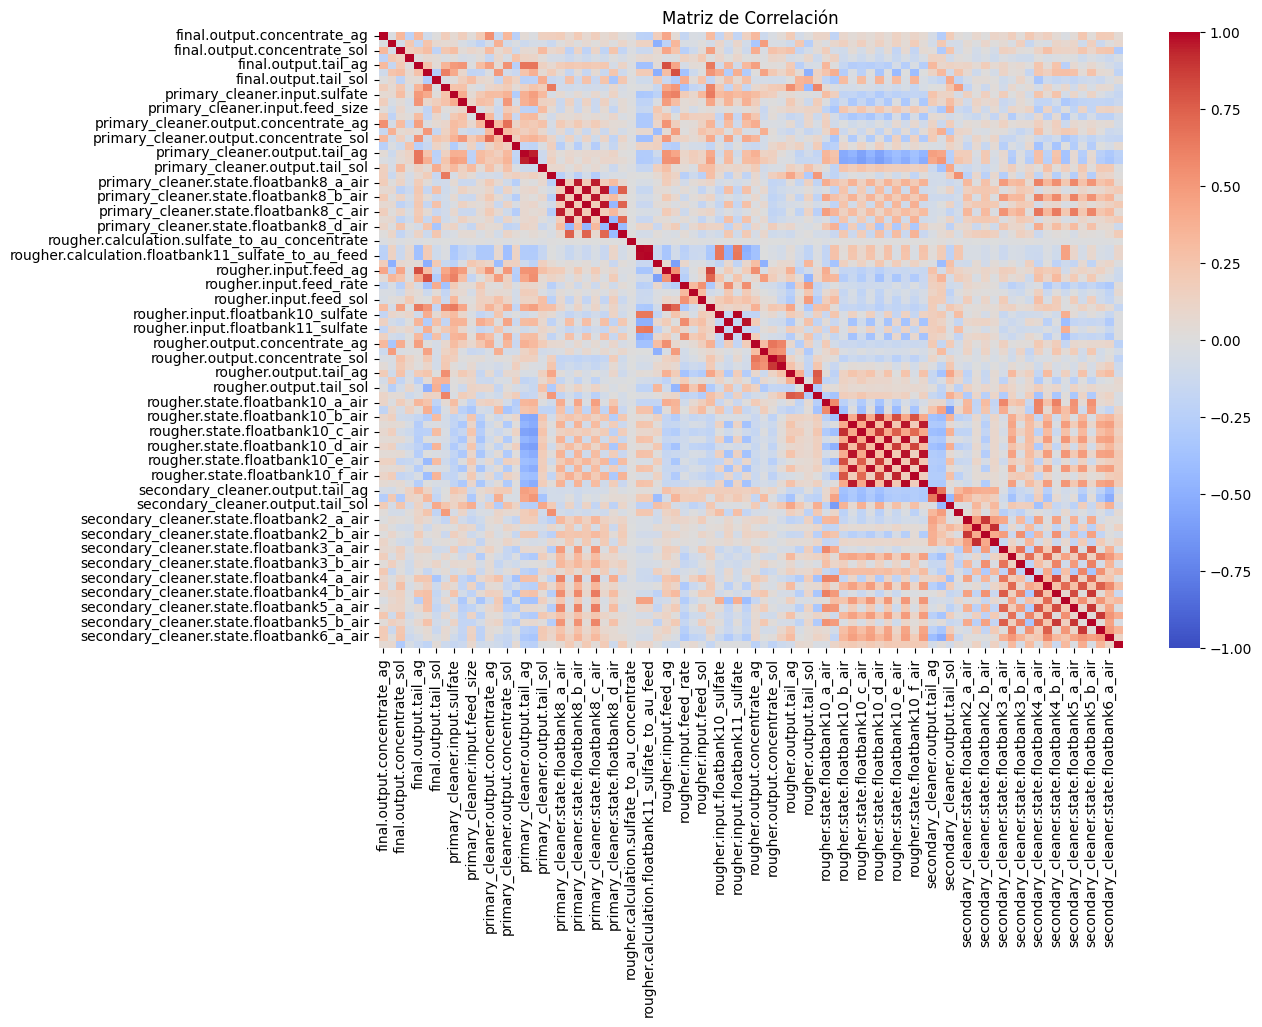

In [27]:
# Creamos un mapa de calor para las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

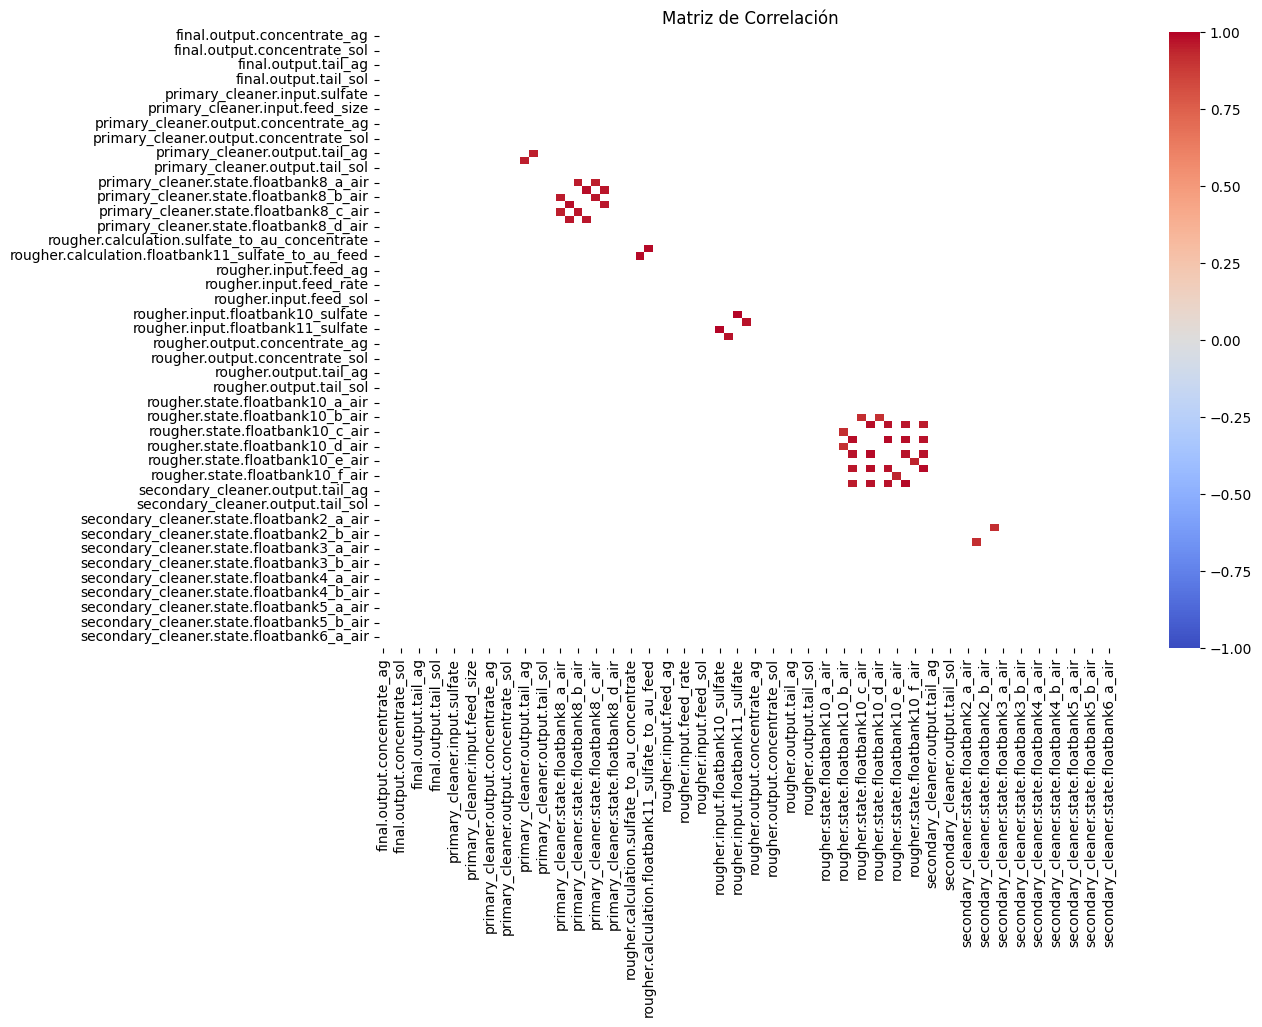

In [28]:
# Creamos un mapa de calor para las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Encontré los siguientes pares con correlaciones absolutas mayores a 0.9:

- primary_cleaner.state.floatbank8_a_air y primary_cleaner.state.floatbank8_b_air: 0.975
- primary_cleaner.state.floatbank8_a_air y primary_cleaner.state.floatbank8_c_air: 0.954
- primary_cleaner.state.floatbank8_b_air y primary_cleaner.state.floatbank8_c_air: 0.966
- rougher.input.floatbank10_sulfate y rougher.input.floatbank11_sulfate: 0.999
- rougher.input.floatbank10_xanthate y rougher.input.floatbank11_xanthate: 0.966
- rougher.state.floatbank10_a_level y rougher.state.floatbank10_b_level: 0.904
- rougher.state.floatbank10_a_level y rougher.state.floatbank10_c_level: 0.905
- rougher.state.floatbank10_a_level y rougher.state.floatbank10_d_level: 0.905
- rougher.state.floatbank10_a_level y rougher.state.floatbank10_e_level: 0.904
- rougher.state.floatbank10_a_level y rougher.state.floatbank10_f_level: 0.904
- rougher.state.floatbank10_b_level y rougher.state.floatbank10_c_level: 0.998
- rougher.state.floatbank10_b_level y rougher.state.floatbank10_d_level: 0.997
- rougher.state.floatbank10_b_level y rougher.state.floatbank10_e_level: 0.996
- rougher.state.floatbank10_b_level y rougher.state.floatbank10_f_level: 0.996
- rougher.state.floatbank10_c_level y rougher.state.floatbank10_d_level: 0.999
- rougher.state.floatbank10_c_level y rougher.state.floatbank10_e_level: 0.998
- rougher.state.floatbank10_c_level y rougher.state.floatbank10_f_level: 0.998
- rougher.state.floatbank10_d_level y rougher.state.floatbank10_e_level: 0.999
- rougher.state.floatbank10_d_level y rougher.state.floatbank10_f_level: 0.998
- rougher.state.floatbank10_e_level y rougher.state.floatbank10_f_level: 0.999
- secondary_cleaner.state.floatbank4_b_air y secondary_cleaner.state.floatbank5_a_air: 0.914
- secondary_cleaner.state.floatbank4_b_air y secondary_cleaner.state.floatbank5_b_air: 0.889
- secondary_cleaner.state.floatbank5_a_air y secondary_cleaner.state.floatbank5_b_air: 0.896
- secondary_cleaner.state.floatbank5_a_level y secondary_cleaner.state.floatbank5_b_level: 0.887


Es posible que los pares de variables mencionados estén midiendo esencialmente lo mismo, o que una sea una función directa de la otra debido a cómo se configuró el proceso o cómo se recopilaron los datos. La correlación superior a |0.9| sugiere que no hay una diferencia significativa entre las variables en términos de los datos

Antes de eliminar las variables mencionadas anteriormente, vamos a hacer un check adicional. Vamos a mirar la correlación con las variables objetivo. Si la correlación es significativa, no deberiamos eliminarlas

In [31]:
# Lista de variables únicas involucradas en los pares con correlaciones altas
variables_to_check = [
    'primary_cleaner.state.floatbank8_a_air',
    'primary_cleaner.state.floatbank8_b_air',
    'primary_cleaner.state.floatbank8_c_air',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_level',
    'secondary_cleaner.state.floatbank4_b_air',
    'secondary_cleaner.state.floatbank5_a_air',
    'secondary_cleaner.state.floatbank5_b_air',
    'secondary_cleaner.state.floatbank5_a_level',
    'secondary_cleaner.state.floatbank5_b_level']

# Variables objetivo
target_variables = ['rougher.output.recovery', 'final.output.recovery']

# Seleccionamos las columnas relevantes 
columns_to_analyze = variables_to_check + target_variables

# Calculamos la matriz de correlación para las columnas seleccionadas
correlation_matrix_check = train[columns_to_analyze].corr()

# Extraemos las correlaciones de las variables objetivo con las variables a eliminar
correlations_with_rougher = correlation_matrix_check['rougher.output.recovery'][variables_to_check]
correlations_with_final = correlation_matrix_check['final.output.recovery'][variables_to_check]

# Combinamos los resultados en un DataFrame para mejor visualización
correlation_results = pd.DataFrame({
    'Variable': variables_to_check,
    'Correlation with rougher.output.recovery': correlations_with_rougher.values,
    'Correlation with final.output.recovery': correlations_with_final.values})

# Mostramos los resultados
print("Correlaciones con las variables objetivo:")
print(correlation_results)

Correlaciones con las variables objetivo:
                                      Variable  \
0       primary_cleaner.state.floatbank8_a_air   
1       primary_cleaner.state.floatbank8_b_air   
2       primary_cleaner.state.floatbank8_c_air   
3            rougher.input.floatbank10_sulfate   
4            rougher.input.floatbank11_sulfate   
5           rougher.input.floatbank10_xanthate   
6           rougher.input.floatbank11_xanthate   
7            rougher.state.floatbank10_a_level   
8            rougher.state.floatbank10_b_level   
9            rougher.state.floatbank10_c_level   
10           rougher.state.floatbank10_d_level   
11           rougher.state.floatbank10_e_level   
12           rougher.state.floatbank10_f_level   
13    secondary_cleaner.state.floatbank4_b_air   
14    secondary_cleaner.state.floatbank5_a_air   
15    secondary_cleaner.state.floatbank5_b_air   
16  secondary_cleaner.state.floatbank5_a_level   
17  secondary_cleaner.state.floatbank5_b_level   

    Cor

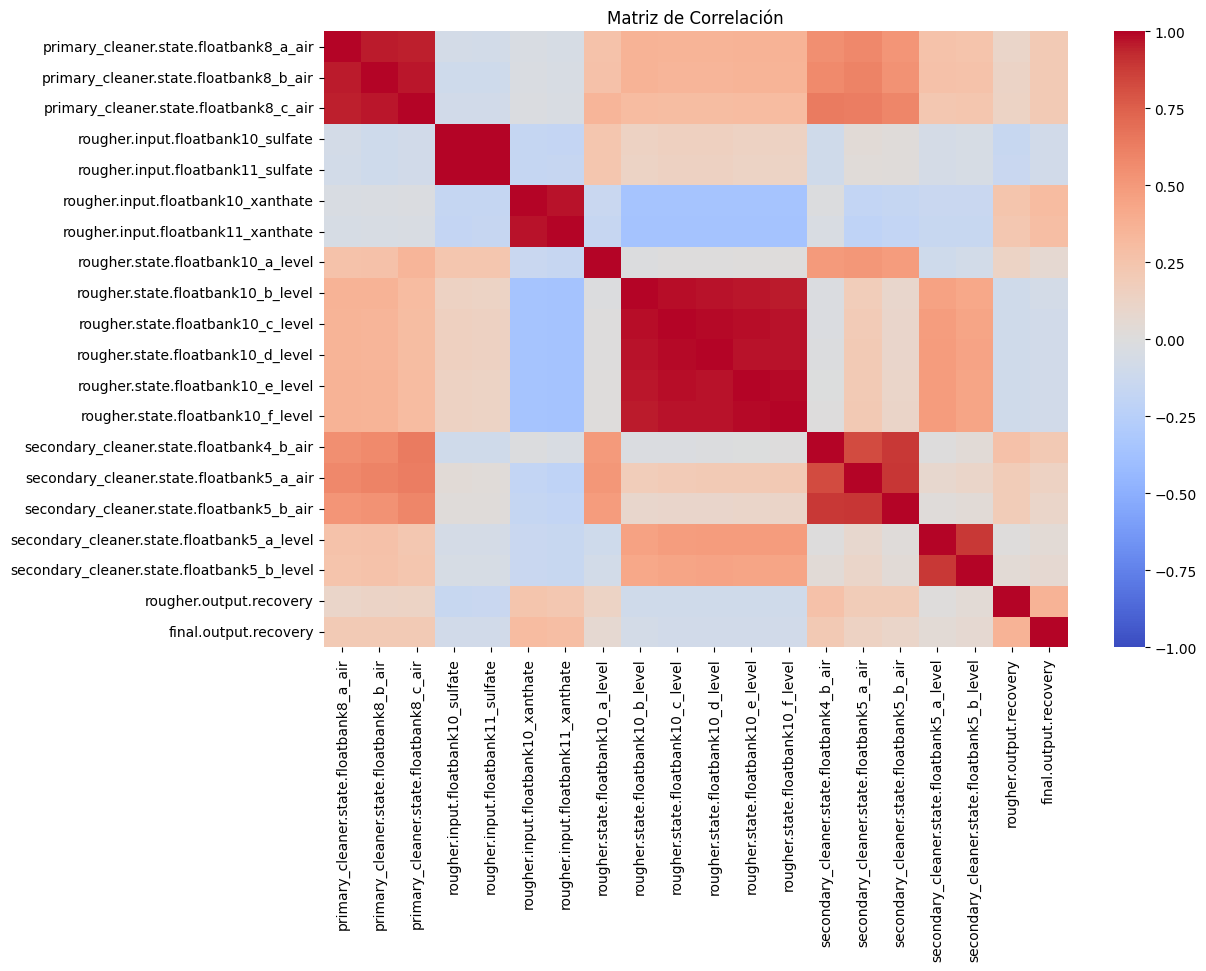

In [32]:
# Creamos un mapa de calor para las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_check, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Las tres variables (floatbank8_a_air, floatbank8_b_air, floatbank8_c_air) tienen correlaciones muy bajas con ambas variables objetivo. Esto indica que no son particularmente importantes para predecir rougher.output.recovery o final.output.recovery. Dado que estas variables están altamente correlacionadas entre sí, eliminar dos de ellas no tendrá un impacto significativo en el modelo, ya que la variable restante captura casi la misma información

Las variables rougher.input.floatbank10_sulfate y rougher.input.floatbank11_sulfate tienen una correlación negativa débil con rougher.output.recovery y una correlación positiva débil con final.output.recovery. 
La correlación con final.output.recovery (0.33) es una de las más altas que hemos visto con las variables objetivo, lo que sugiere que el sulfato en la etapa rougher tiene cierta relevancia para predecir la recuperación final. Sin embargo, dado que las dos variables tienen una correlación de 0.999 entre sí, sus correlaciones con las variables objetivo son casi idénticas, significa que eliminar una de ellas no afectará la capacidad del modelo para predecir las variables objetivo, ya que la variable restante (floatbank10_sulfate) captura prácticamente la misma información

rougher.input.floatbank10_xanthate y rougher.input.floatbank11_xanthate tienen correlaciones débiles con ambas variables objetivo, pero son un poco más relevantes para rougher.output.recovery (0.189) que las variables anteriores.
Dado que tienen una correlación muy alta entre sí (0.966), sus correlaciones con las variables objetivo son idénticas. Eliminar una de ellas no tendrá un impacto significativo, ya que la variable restante captura casi la misma información

Todas las variables de nivel (floatbank10_a_level, floatbank10_b_level, ..., floatbank10_f_level) tienen correlaciones muy bajas con ambas variables objetivo. Dado que estas variables están extremadamente correlacionadas entre sí, eliminar todas menos una no tendrá un impacto significativo en el modelo. La variable restante captura casi toda la información de las otras

#### Lista final de columnas a eliminar

In [35]:
columns_to_drop = ['primary_cleaner.state.floatbank8_b_air',
    'primary_cleaner.state.floatbank8_c_air',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_level',
    'secondary_cleaner.state.floatbank5_b_air',
    'secondary_cleaner.state.floatbank5_b_level']

# Eliminamos las columnas de train y test
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

### 2. Análisis de datos

#### 2.1 Concentración de metales (Au, Ag, Pb)

Necesitamos encontrar las columnas en los dataframes que representan la concentración de oro (Au), plata (Ag) y plomo (Pb) en las diferentes etapas del proceso. Estas etapas son, principalmente:

- Materia prima (Feed): Columnas que comiencen con rougher.input.feed_ y contengan au, ag, o pb. Esta representa la concentración de los metales (Au, Ag, Pb) en el material que entra al proceso de recuperación. Es el punto de partida para observar cómo la concentración cambia a medida que el material se procesa
  
- Concentrado rougher: Columnas que comiencen con rougher.output.concentrate_ y contengan au, ag, o pb. Después de la etapa inicial de flotación en el "rougher", se obtiene un concentrado con una mayor proporción de los metales valiosos. Al comparar la concentración aquí con la de la materia prima, podemos ver el efecto de esta primera etapa de concentración

  
- Concentrado final: Columnas que comiencen con final.output.concentrate_ y contengan au, ag, o pb. Esta representa la concentración de los metales después de que el material ha pasado por todas las etapas de purificación, incluyendo el "rougher" y las etapas de limpieza primaria y secundaria. Al comparar esta concentración con la del concentrado "rougher", podemos ver el impacto total de las etapas de limpieza en la concentración final de los metales

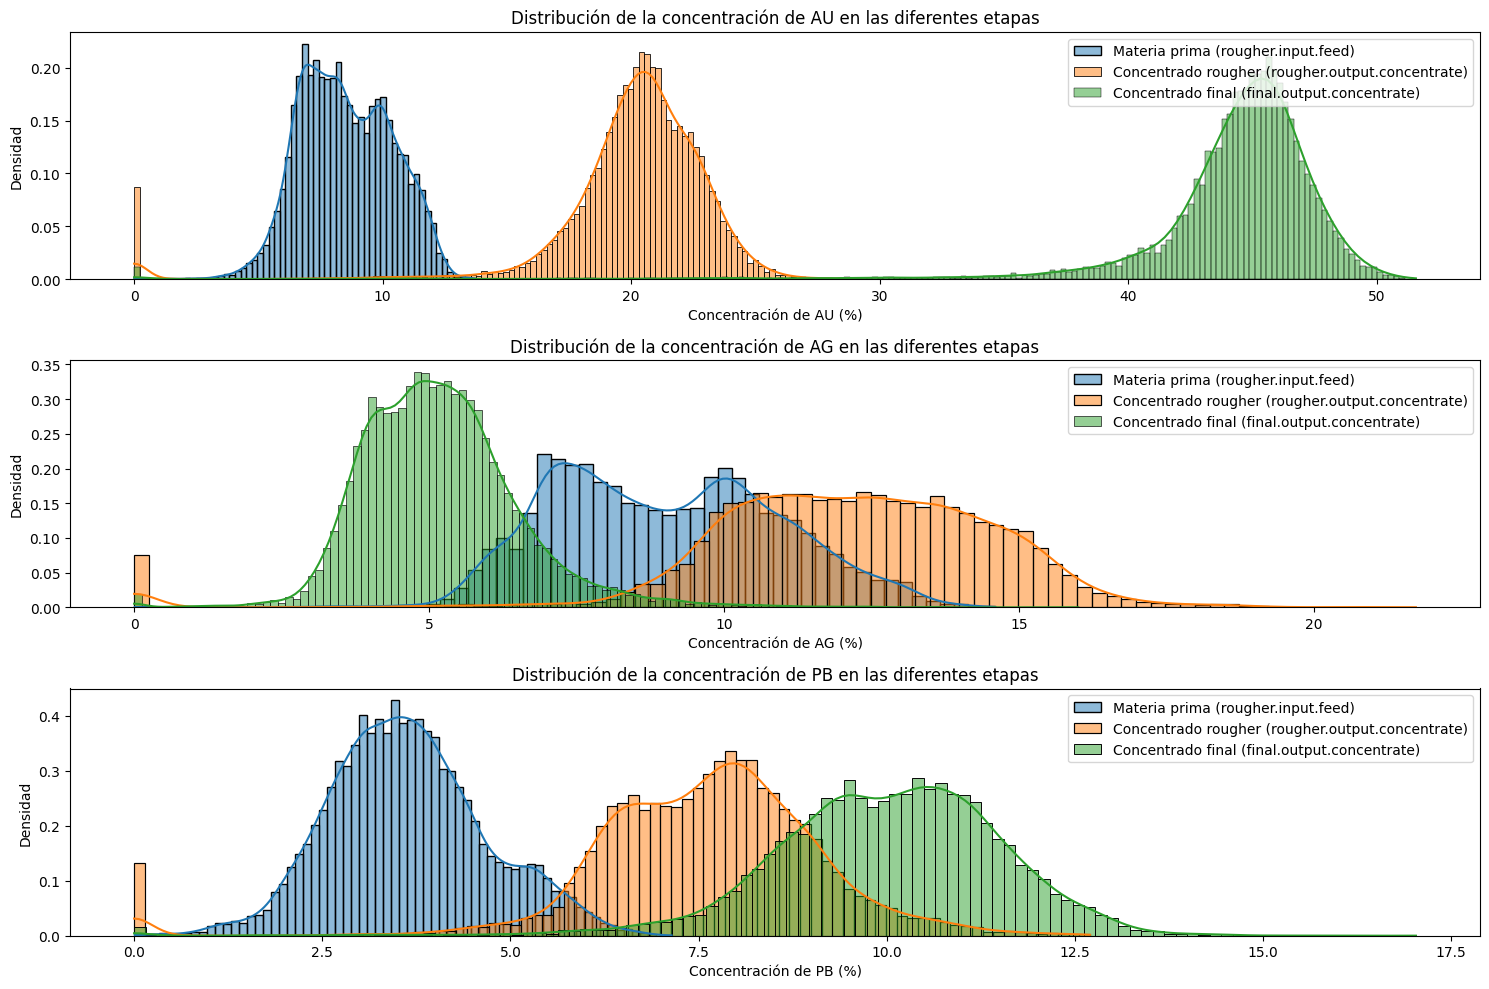


Estadísticas de AU en las diferentes etapas:

Materia prima (rougher.input.feed):
count    16094.000000
mean         8.516990
std          1.828474
min          0.010000
25%          7.080266
50%          8.366978
75%          9.939579
max         13.731330
Name: rougher.input.feed_au, dtype: float64

Concentrado rougher (rougher.output.concentrate):
count    16094.000000
mean        20.052152
std          3.620905
min          0.000000
25%         19.142941
50%         20.507430
75%         21.916971
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64

Concentrado final (final.output.concentrate):
count    16094.000000
mean        44.307437
std          4.210135
min          0.000000
25%         43.431184
50%         44.986391
75%         46.253912
max         51.571885
Name: final.output.concentrate_au, dtype: float64

Estadísticas de AG en las diferentes etapas:

Materia prima (rougher.input.feed):
count    16094.000000
mean         8.985281
std          1.910

In [38]:
# Definimos las etapas y los metales
metals = ['au', 'ag', 'pb']
stages = {'Materia prima (rougher.input.feed)': 'rougher.input.feed_',
    'Concentrado rougher (rougher.output.concentrate)': 'rougher.output.concentrate_',
    'Concentrado final (final.output.concentrate)': 'final.output.concentrate_'}

# Crear una figura con subplots
plt.figure(figsize=(15, 10))

# Iterar sobre cada metal
for i, metal in enumerate(metals, 1):
    plt.subplot(3, 1, i)
    for stage_name, stage_prefix in stages.items():
        column = f"{stage_prefix}{metal}"
        sns.histplot(data=full[column], label=stage_name, kde=True, stat='density', alpha=0.5)
    plt.title(f"Distribución de la concentración de {metal.upper()} en las diferentes etapas")
    plt.xlabel(f"Concentración de {metal.upper()} (%)")
    plt.ylabel("Densidad")
    plt.legend()
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
for metal in metals:
    print(f"\nEstadísticas de {metal.upper()} en las diferentes etapas:")
    for stage_name, stage_prefix in stages.items():
        column = f"{stage_prefix}{metal}"
        print(f"\n{stage_name}:")
        print(full[column].describe())

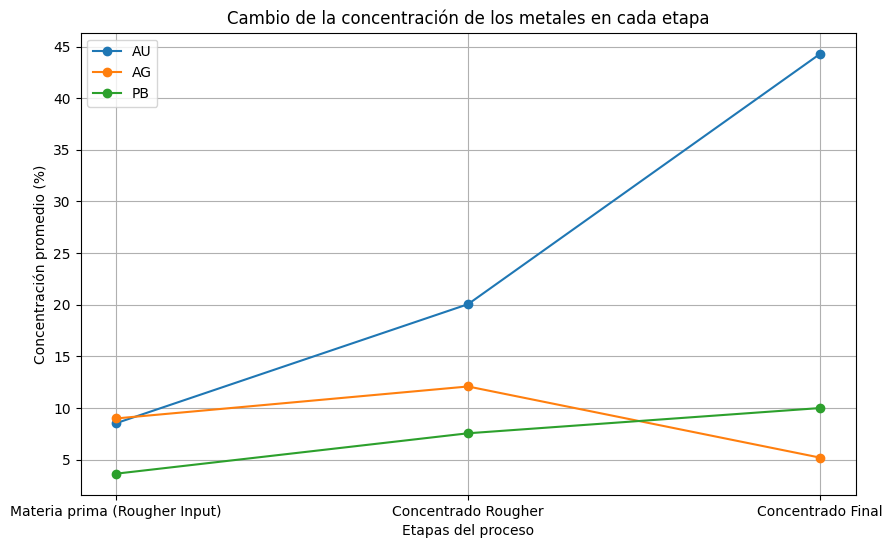

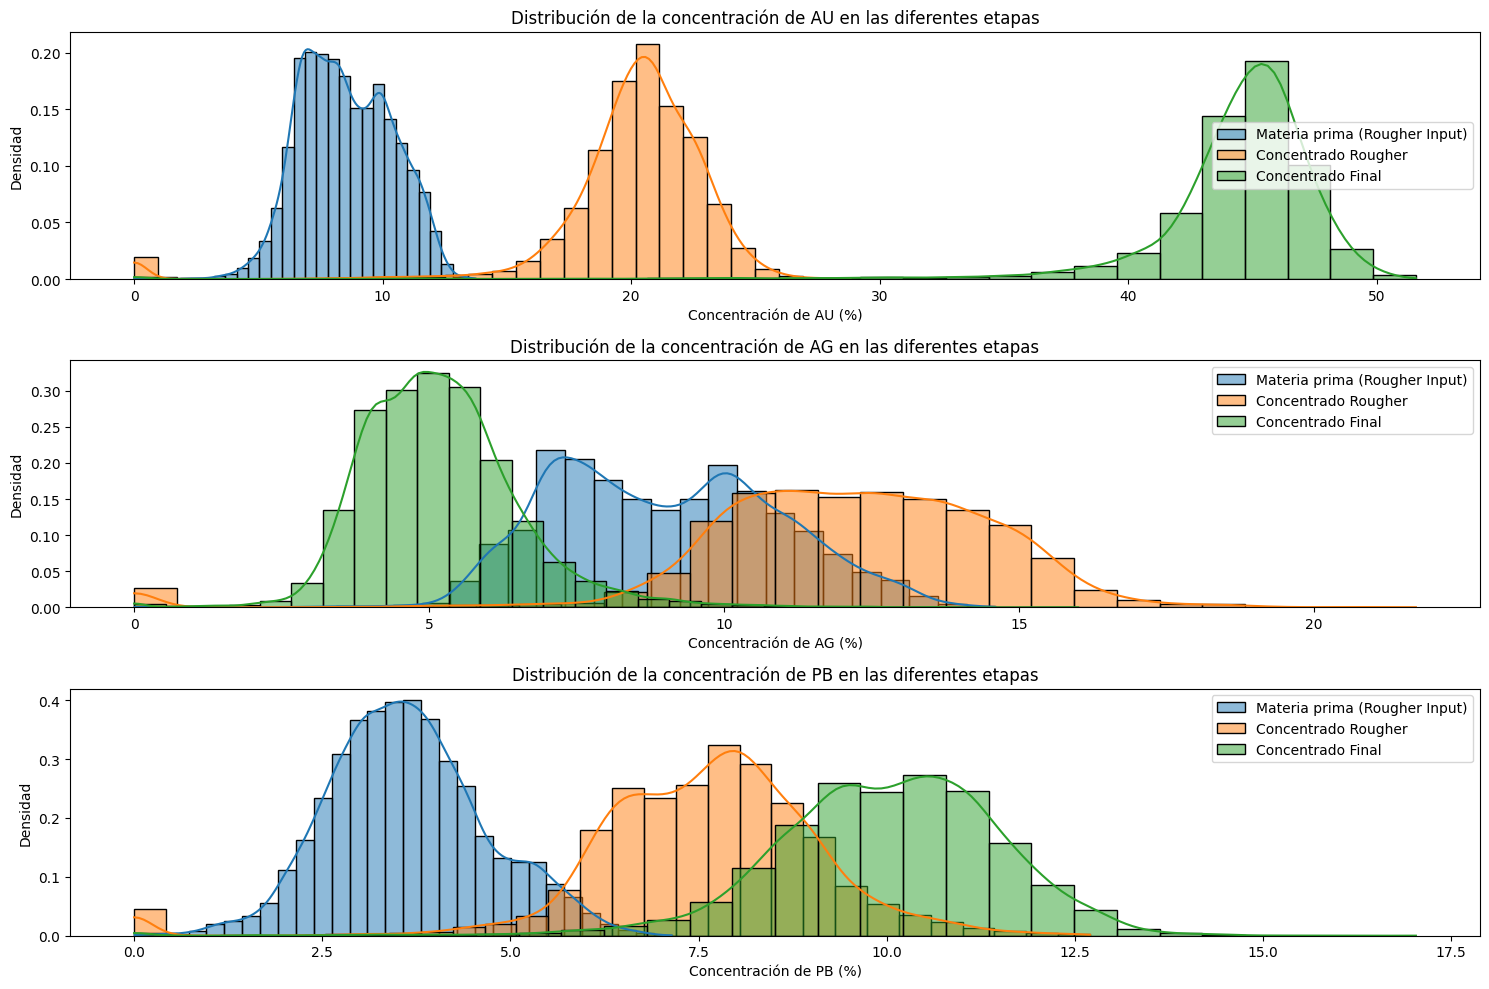

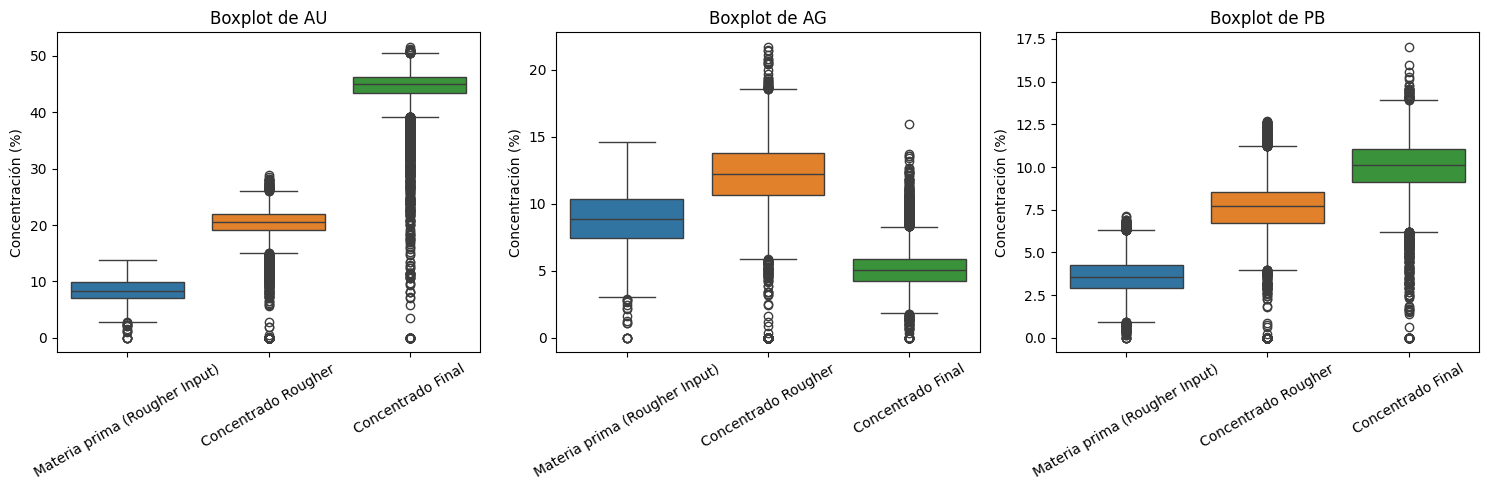

In [39]:
# Definimos las etapas y los metales
metals = ['au', 'ag', 'pb']
stages = {'Materia prima (Rougher Input)': 'rougher.input.feed_',
    'Concentrado Rougher': 'rougher.output.concentrate_',
    'Concentrado Final': 'final.output.concentrate_'}

# Hacemos grafico de líneas para ver la evolución de la concentración en cada etapa

# Creamos un DataFrame con los valores promedio de cada etapa
mean_concentrations = {stage: [full[f"{prefix}{metal}"].mean() for metal in metals] for stage, prefix in stages.items()}
df_means = pd.DataFrame(mean_concentrations, index=metals).T

# Graficamos la evolución de la concentración de cada metal
plt.figure(figsize=(10, 6))
for metal in metals:
    plt.plot(df_means.index, df_means[metal], marker='o', label=f'{metal.upper()}')

plt.xlabel("Etapas del proceso")
plt.ylabel("Concentración promedio (%)")
plt.title("Cambio de la concentración de los metales en cada etapa")
plt.legend()
plt.grid(True)
plt.show()
print('\n')

# Creamos una figura con subplots para histogramas
plt.figure(figsize=(15, 10))

# Iteramos sobre cada metal
for i, metal in enumerate(metals, 1):
    plt.subplot(3, 1, i)
    for stage_name, stage_prefix in stages.items():
        column = f"{stage_prefix}{metal}"
        sns.histplot(data=full[column], label=stage_name, kde=True, bins=30, stat='density', alpha=0.5)
    plt.title(f"Distribución de la concentración de {metal.upper()} en las diferentes etapas")
    plt.xlabel(f"Concentración de {metal.upper()} (%)")
    plt.ylabel("Densidad")
    plt.legend()
plt.tight_layout()
plt.show()
print('\n')

# Creamos boxplots para visualizar outliers

plt.figure(figsize=(15, 5))

for i, metal in enumerate(metals, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=full[[f"{prefix}{metal}" for prefix in stages.values()]], orient='v')
    plt.xticks(range(3), stages.keys(), rotation=30)
    plt.title(f"Boxplot de {metal.upper()}")
    plt.ylabel("Concentración (%)")

plt.tight_layout()
plt.show()

#### Análisis de la evolución de la concentración de metales

Observando la evolución de la concentración promedio de cada metal en las diferentes etapas del proceso, se pueden identificar las siguientes tendencias:

- Oro (Au): La concentración de oro muestra un crecimiento constante a lo largo de las etapas del proceso, con una tendencia exponencial que alcanza su valor máximo en la etapa de concentrado final.

- Plata (Ag): La concentración de plata aumenta desde la materia prima hasta el concentrado rougher, pero posteriormente decrece en la etapa de concentrado final, alcanzando su punto mínimo.

- Plomo (Pb): La concentración de plomo sigue una tendencia creciente a lo largo del proceso, pero a diferencia del oro, su crecimiento es lineal.

Estas conclusiones se respaldan con los gráficos de boxplot, donde se observa que los cambios en la mediana siguen el patrón descrito anteriormente. Además, se evidencia el impacto de los valores atípicos, cuyo número aumenta en la etapa de concentrado final.

Otro aspecto relevante es el rango intercuartílico (IQR), en el caso del oro, este es menor en comparación con la plata y el plomo, lo que indica una menor dispersión de los datos para este metal.

Finalmente, al analizar las distribuciones de densidad, se observa que los tres metales presentan una distribución aproximadamente normal en cada etapa del proceso. Sin embargo, el número de observaciones parece disminuir progresivamente desde la materia prima hasta el concentrado final.

### 2.2 Comparación de las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba

Variables relevantes:

- primary_cleaner.input.feed_size

- rougher.input.feed_size

Estas representan el tamaño de las partículas en dos etapas diferentes del proceso.

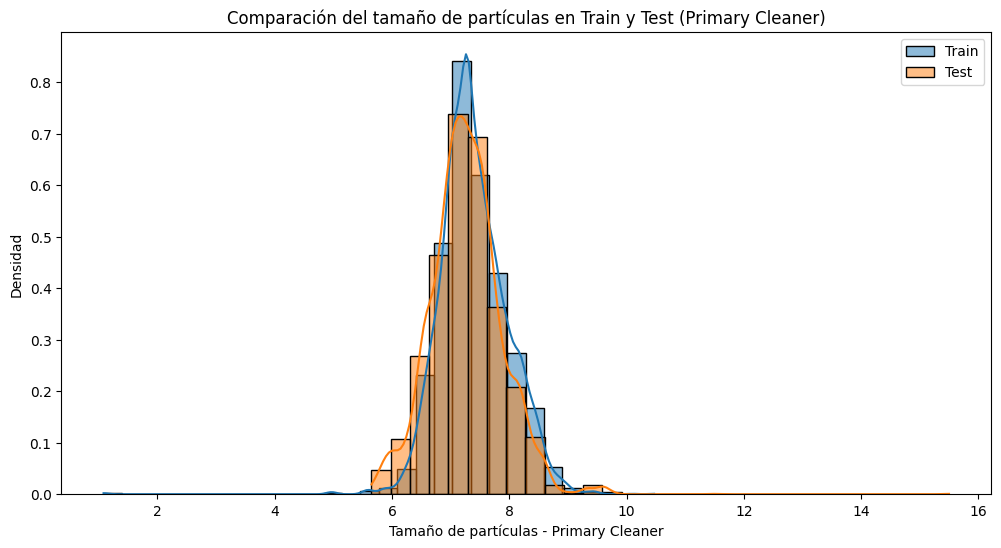

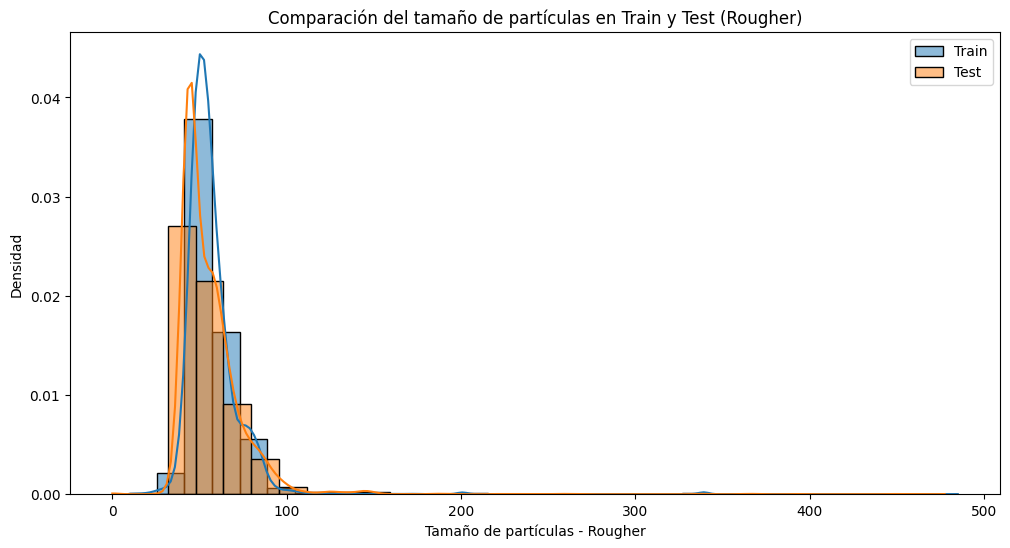

In [42]:
# Comparación de primary_cleaner.input.feed_size
plt.figure(figsize=(12, 6))

sns.histplot(train['primary_cleaner.input.feed_size'], label='Train', kde=True, stat="density", bins=30, alpha=0.5)
sns.histplot(test['primary_cleaner.input.feed_size'], label='Test', kde=True, stat="density", bins=30, alpha=0.5)

plt.xlabel("Tamaño de partículas - Primary Cleaner")
plt.ylabel("Densidad")
plt.title("Comparación del tamaño de partículas en Train y Test (Primary Cleaner)")
plt.legend()
plt.show()

# Comparación de rougher.input.feed_size
plt.figure(figsize=(12, 6))

sns.histplot(train['rougher.input.feed_size'], label='Train', kde=True, stat="density", bins=30, alpha=0.5)
sns.histplot(test['rougher.input.feed_size'], label='Test', kde=True, stat="density", bins=30, alpha=0.5)

plt.xlabel("Tamaño de partículas - Rougher")
plt.ylabel("Densidad")
plt.title("Comparación del tamaño de partículas en Train y Test (Rougher)")
plt.legend()
plt.show()


A simple vista las distribucione se ven parecidas

Haremos la siguientes pruebas de hipotesis para tener certeza:

- Prueba t de Student: Para comparar si las medias de los tamaños de partícula en los conjuntos de entrenamiento y prueba son significativamente diferentes.

- ANOVA: Para comparar la varianza entre los dos conjuntos.

- Bootstrapping: Para estimar la diferencia de medias mediante remuestreo.



In [44]:
# Definir las variables de tamaño de partícula
train_particle_size = train["rougher.input.feed_size"]
test_particle_size = test["rougher.input.feed_size"]

# 1. Prueba t de Student
t_stat, p_value_t = stats.ttest_ind(train_particle_size, test_particle_size, equal_var=False)
print(f"Prueba t de Student: t-stat = {t_stat:.4f}, p-value = {p_value_t:.4f}")
print('Rechazamos la hipótesis nula \n')

# 2. ANOVA
f_stat, p_value_anova = stats.f_oneway(train_particle_size, test_particle_size)
print(f"ANOVA: F-stat = {f_stat:.4f}, p-value = {p_value_anova:.4f}")
print('Rechazamos la hipótesis nula \n')


# 3. Bootstrapping
n_iterations = 10000
bootstrap_diffs = []
for _ in range(n_iterations):
    sample_train = np.random.choice(train_particle_size, size=len(train_particle_size), replace=True)
    sample_test = np.random.choice(test_particle_size, size=len(test_particle_size), replace=True)
    bootstrap_diffs.append(np.mean(sample_train) - np.mean(sample_test))

# Intervalo de confianza del 95%
ci_lower, ci_upper = np.percentile(bootstrap_diffs, [2.5, 97.5])
print(f"Bootstrapping: Intervalo de confianza del 95% para la diferencia de medias: ({ci_lower:.4f}, {ci_upper:.4f})")


Prueba t de Student: t-stat = 2.5192, p-value = 0.0118
Rechazamos la hipótesis nula 

ANOVA: F-stat = 7.0008, p-value = 0.0082
Rechazamos la hipótesis nula 

Bootstrapping: Intervalo de confianza del 95% para la diferencia de medias: (0.1876, 1.5463)


Dado que las tres pruebas indican diferencias significativas, podemos concluir que el tamaño de partícula en el conjunto de entrenamiento y en el conjunto de prueba no tienen la misma distribución. Esto implica que si se entrena un modelo con estos datos, podría generar problemas en la evaluación debido a que el conjunto de prueba no representa correctamente el conjunto de entrenamiento

Para el bottstrapping, si este intervalo incluyera el cero, significaría que no hay evidencia suficiente para afirmar que la diferencia de medias es significativa.

Como en nuestro caso el intervalo fue (0.1901, 1.5503), y no incluye el cero, esto significa que existe una diferencia real entre las medias.

Investigando un poco encontré la prueba de Kolmogorov-Smirnov que se usa para comparar distribuciones y verificar si dos muestras provienen de la misma distribución

Vamos a usarla

In [47]:
# Prueba estadística de Kolmogorov-Smirnov
ks_stat1, p_value1 = ks_2samp(train['primary_cleaner.input.feed_size'], test['primary_cleaner.input.feed_size'])
ks_stat2, p_value2 = ks_2samp(train['rougher.input.feed_size'], test['rougher.input.feed_size'])

print(f"KS Test para Primary Cleaner: Estadístico={ks_stat1:.4f}, p-valor={p_value1:.4f}")
print(f"KS Test para Rougher: Estadístico={ks_stat2:.4f}, p-valor={p_value2:.4f}")

# Interpretación del p-valor
if p_value1 < 0.05:
    print("Las distribuciones de 'primary_cleaner.input.feed_size' son significativamente diferentes entre Train y Test.")
else:
    print("Las distribuciones de 'primary_cleaner.input.feed_size' son similares entre Train y Test.")

if p_value2 < 0.05:
    print("Las distribuciones de 'rougher.input.feed_size' son significativamente diferentes entre Train y Test.")
else:
    print("Las distribuciones de 'rougher.input.feed_size' son similares entre Train y Test.")


KS Test para Primary Cleaner: Estadístico=0.1014, p-valor=0.0000
KS Test para Rougher: Estadístico=0.2358, p-valor=0.0000
Las distribuciones de 'primary_cleaner.input.feed_size' son significativamente diferentes entre Train y Test.
Las distribuciones de 'rougher.input.feed_size' son significativamente diferentes entre Train y Test.


La distribución del tamaño de partícula tanto en la etapa "Primary Cleaner" como en la etapa "Rougher" son significativamente diferentes entre el conjunto de entrenamiento y el de prueba

Como opción para solucionarlo podemos aplicar normalización de los datos

### 2.3 Concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final

- **Materia prima:** (rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_au, rougher.input.feed_sol)

- **Concentrado Rougher:** (rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_au, rougher.output.concentrate_sol)

- **Concentrado Final:** (final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_au, final.output.concentrate_sol)

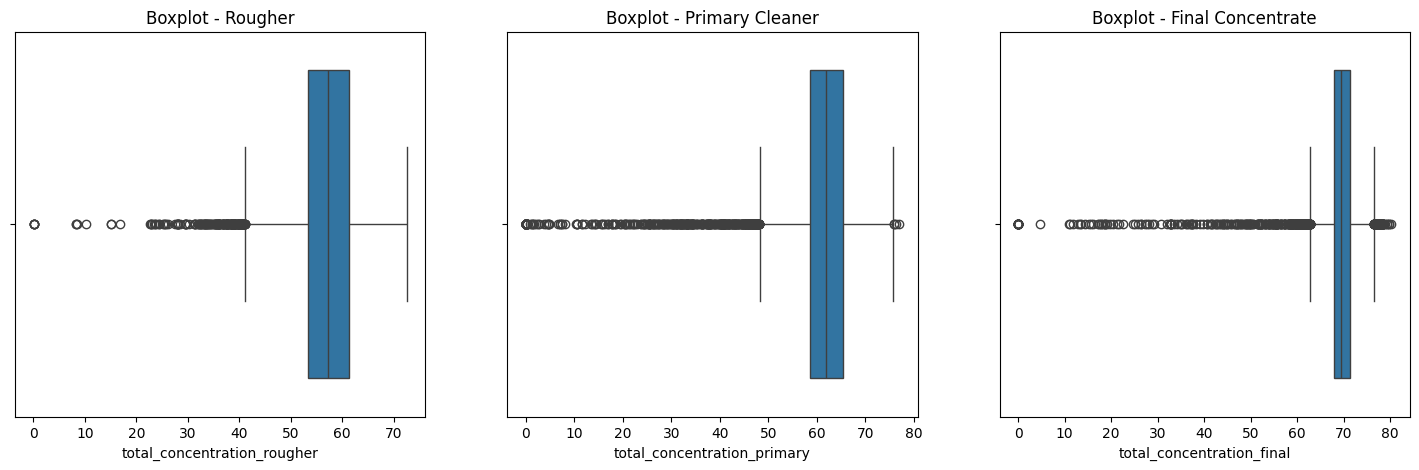

In [50]:
# Definimos las columnas relevantes para cada etapa del proceso
columns_rougher = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
columns_primary = ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au']
columns_final = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

# Calculamos la concentración total en cada etapa
train['total_concentration_rougher'] = train[columns_rougher].sum(axis=1)
train['total_concentration_primary'] = train[columns_primary].sum(axis=1)
train['total_concentration_final'] = train[columns_final].sum(axis=1)

# Creamos boxplots para identificar valores atípicos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x=train['total_concentration_rougher'], ax=axes[0])
axes[0].set_title("Boxplot - Rougher")

sns.boxplot(x=train['total_concentration_primary'], ax=axes[1])
axes[1].set_title("Boxplot - Primary Cleaner")

sns.boxplot(x=train['total_concentration_final'], ax=axes[2])
axes[2].set_title("Boxplot - Final Concentrate")

plt.show()

In [51]:
# Función para contar valores atípicos inferiores y superiores
def contar_outliers_detallado(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    outliers_inferiores = (df[column] < lower_bound).sum()
    outliers_superiores = (df[column] > upper_bound).sum()

    return outliers_inferiores, outliers_superiores

# Variables de concentración total
variables_concentracion = ['total_concentration_rougher', 
    'total_concentration_primary', 
    'total_concentration_final']

# Contar valores atípicos detalladamente
outliers_detallados = {col: contar_outliers_detallado(train, col) for col in variables_concentracion}

# Imprimir resultados
for var, (count_inf, count_sup) in outliers_detallados.items():
    print(f"Valores atípicos en {var}:")
    print(f" Hacia la izquierda (< límite inferior): {count_inf} ({(count_inf / len(train)) * 100:.2f}% del dataset)")
    print(f" Hacia la derecha  (> límite superior): {count_sup} ({(count_sup / len(train)) * 100:.2f}% del dataset)")
    print("" * 50)


Valores atípicos en total_concentration_rougher:
 Hacia la izquierda (< límite inferior): 189 (1.72% del dataset)
 Hacia la derecha  (> límite superior): 0 (0.00% del dataset)

Valores atípicos en total_concentration_primary:
 Hacia la izquierda (< límite inferior): 458 (4.16% del dataset)
 Hacia la derecha  (> límite superior): 4 (0.04% del dataset)

Valores atípicos en total_concentration_final:
 Hacia la izquierda (< límite inferior): 481 (4.37% del dataset)
 Hacia la derecha  (> límite superior): 123 (1.12% del dataset)



Como se observa, hay presencia de outliers pero no es tan significativa si se compara con el total de la base (maximo 5.49%). La gran mayoria de outliers está hacia el lado izquierdo (< límite inferior), sugieriendo que en ciertos momentos del proceso hubo problemas en la eficiencia de la flotación o en la alimentación del mineral.

Por otro lado, y siendo mucho menos representativo, valores altos en la etapa final (> límite superior) pueden ser situaciones donde el proceso extrajo más metal del esperado, lo que podría ser beneficioso, pero si ocurre de forma inconsistente, podría indicar falta de estabilidad en el proceso

La pregunta clase es: Estos valores atípicos reflejan fallos en el proceso o simplemente variabilidad natural del mineral? Si es lo primero, eliminarlos ayudaría a construir un modelo más estable. Si es lo segundo, es mejor mantenerlos y analizar cómo optimizar el proceso.

Para este caso, teniendo en cuenta que los datos no son tan representativos, y tambien porque nos lo pide el enunciado, los eliminaremos

In [53]:
# Función para eliminar valores atípicos
def eliminar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar la eliminación de outliers a las variables de concentración total solo en train
train_filtrado = train.copy()
for col in variables_concentracion:
    if col in train_filtrado.columns:  # Verificar que la columna existe
        train_filtrado = eliminar_outliers(train_filtrado, col)

# Comparar el tamaño antes y después del filtrado
print(f"Filas antes del filtrado: {train.shape[0]}")
print(f"Filas después del filtrado: {train_filtrado.shape[0]}")

Filas antes del filtrado: 11017
Filas después del filtrado: 9913


### 3. Construyendo el modelo

#### 3.1 Función sMAPE

Para hacer la validación cruzada con sMAPE, toca hacerlo manual ya que cross_val_score solo acepta métricas predefinidas en scoring (como neg_mean_absolute_error, r2, neg_mean_squared_error, etc.). sMAPE no es una métrica predefinida en Scikit-Learn, por lo que no podemos usarla directamente en cross_val_score.

In [55]:
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Definimos la función para el sMAPE final combinado: 25% rougher + 75% final
def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

#### 3.2 Prueba de modelos

In [57]:
# Variables predictoras (excluyendo la fecha y la variable objetivo)
X = train_filtrado.drop(columns=['date', 'final.output.recovery', 'rougher.output.recovery','total_concentration_rougher', 'total_concentration_primary', 'total_concentration_final' ])
y_final = train_filtrado['final.output.recovery']
y_rougher = train_filtrado['rougher.output.recovery']

# Dividimos train_filtrado en entrenamiento y validación (75%-25%)
X_train, X_val, y_final_train, y_final_val, y_rougher_train, y_rougher_val = train_test_split(
    X, y_final, y_rougher, test_size=0.25, random_state=12345)


#### Regresión lineal

In [59]:

# Lista para almacenar los resultados de sMAPE en cada fold
smape_scores_final = []
smape_scores_rougher = []

# Realizamos validación cruzada manualmente con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12345)
# Realizamos validación cruzada para ambos modelos
for train_index, val_index in kf.split(X_train):
    # Dividimos los datos en entrenamiento y validación para este fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_final_train_fold, y_final_val_fold = y_final_train.iloc[train_index], y_final_train.iloc[val_index]
    y_rougher_train_fold, y_rougher_val_fold = y_rougher_train.iloc[train_index], y_rougher_train.iloc[val_index]
    
    # Creamos dos modelos de Regresión Lineal (uno para cada objetivo)
    lr_model_final = LinearRegression()
    lr_model_rougher = LinearRegression()
    
    # Entrenamos el modelo para final.output.recovery
    lr_model_final.fit(X_train_fold, y_final_train_fold)
    y_final_pred_fold = lr_model_final.predict(X_val_fold)
    
    # Entrenamos el modelo para rougher.output.recovery
    lr_model_rougher.fit(X_train_fold, y_rougher_train_fold)
    y_rougher_pred_fold = lr_model_rougher.predict(X_val_fold)
    
    # Calculamos sMAPE para cada objetivo y lo almacenamos
    smape_scores_final.append(smape(y_final_val_fold, y_final_pred_fold))
    smape_scores_rougher.append(smape(y_rougher_val_fold, y_rougher_pred_fold))

# Calculamos el promedio de sMAPE para cada objetivo
mean_smape_final = np.mean(smape_scores_final)
mean_smape_rougher = np.mean(smape_scores_rougher)

# Calculamos el sMAPE final combinado
mean_final_smape = final_smape(mean_smape_rougher, mean_smape_final)

# Mostramos los resultados
print(f"Promedio sMAPE en validación cruzada para final.output.recovery: {mean_smape_final:.2f}%")
print(f"Promedio sMAPE en validación cruzada para rougher.output.recovery: {mean_smape_rougher:.2f}%")
print(f"sMAPE final combinado en validación cruzada: {mean_final_smape:.2f}%")


Promedio sMAPE en validación cruzada para final.output.recovery: 1.47%
Promedio sMAPE en validación cruzada para rougher.output.recovery: 3.69%
sMAPE final combinado en validación cruzada: 2.02%


Un sMAPE de 2.02% en validación es bastante bueno, indica que, en promedio, las predicciones del modelo están desviadas un 2.02% respecto al valor real

#### Regresión lineal con variables estandarizadas

In [62]:
# Listas para almacenar los resultados de sMAPE en cada fold (con sufijo _scaler)
smape_scores_final_scaler = []
smape_scores_rougher_scaler = []

# Configuramos la validación cruzada con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12345)

# Realizamos validación cruzada para ambos modelos con estandarización
for train_index, val_index in kf.split(X_train):
    # Dividimos los datos en entrenamiento y validación para este fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_final_train_fold, y_final_val_fold = y_final_train.iloc[train_index], y_final_train.iloc[val_index]
    y_rougher_train_fold, y_rougher_val_fold = y_rougher_train.iloc[train_index], y_rougher_train.iloc[val_index]
    
    # Estandarizamos las variables predictoras
    scaler = StandardScaler()
    
    # Ajustamos el scaler solo con los datos de entrenamiento y transformamos
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    # Transformamos los datos de validación con el mismo scaler
    X_val_fold_scaled = scaler.transform(X_val_fold)
    
    # Creamos dos modelos de Regresión Lineal con sufijo _scaler
    lr_model_final_scaler = LinearRegression()
    lr_model_rougher_scaler = LinearRegression()
    
    # Entrenamos el modelo para final.output.recovery con datos escalados
    lr_model_final_scaler.fit(X_train_fold_scaled, y_final_train_fold)
    y_final_pred_fold = lr_model_final_scaler.predict(X_val_fold_scaled)
    
    # Entrenamos el modelo para rougher.output.recovery con datos escalados
    lr_model_rougher_scaler.fit(X_train_fold_scaled, y_rougher_train_fold)
    y_rougher_pred_fold = lr_model_rougher_scaler.predict(X_val_fold_scaled)
    
    # Calculamos sMAPE para cada objetivo y lo almacenamos en las listas con _scaler
    smape_scores_final_scaler.append(smape(y_final_val_fold, y_final_pred_fold))
    smape_scores_rougher_scaler.append(smape(y_rougher_val_fold, y_rougher_pred_fold))

# Calculamos el promedio de sMAPE para cada objetivo (con sufijo _scaler)
mean_smape_final_scaler = np.mean(smape_scores_final_scaler)
mean_smape_rougher_scaler = np.mean(smape_scores_rougher_scaler)

# Calculamos el sMAPE final combinado (con sufijo _scaler)
mean_final_smape_scaler = final_smape(mean_smape_rougher_scaler, mean_smape_final_scaler)

# Mostramos los resultados
print(f"Promedio sMAPE en validación cruzada para final.output.recovery (con scaler): {mean_smape_final_scaler:.2f}%")
print(f"Promedio sMAPE en validación cruzada para rougher.output.recovery (con scaler): {mean_smape_rougher_scaler:.2f}%")
print(f"sMAPE final combinado en validación cruzada (con scaler): {mean_final_smape_scaler:.2f}%")

Promedio sMAPE en validación cruzada para final.output.recovery (con scaler): 1.47%
Promedio sMAPE en validación cruzada para rougher.output.recovery (con scaler): 2.96%
sMAPE final combinado en validación cruzada (con scaler): 1.84%


### Analisis estandarización

Se evidencia una leve mejoria en el sMAPE combinado con la estandarización, impulsado por el sMAPE de la variable rougher.output.recovery

Debido a esto, se procede a realizar arbol de decisión y random forest con variables estandarizadas

### Arbol de decisión

In [65]:
# Importamos las librerías necesarias (ya las tienes, pero las incluyo por claridad)
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Variables para almacenar los mejores resultados
best_depth = None
best_final_smape_scaler_dt = float('inf')
best_smape_final_scaler_dt = None
best_smape_rougher_scaler_dt = None

# Configuramos la validación cruzada con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12345)

# Bucle para probar profundidades de 1 a 20
for depth in range(1, 21):
    # Listas para almacenar los resultados de sMAPE en cada fold
    smape_scores_final_scaler_dt = []
    smape_scores_rougher_scaler_dt = []
    
    # Realizamos validación cruzada para Árbol de Decisión con estandarización
    for train_index, val_index in kf.split(X_train):
        # Dividimos los datos en entrenamiento y validación para este fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_final_train_fold, y_final_val_fold = y_final_train.iloc[train_index], y_final_train.iloc[val_index]
        y_rougher_train_fold, y_rougher_val_fold = y_rougher_train.iloc[train_index], y_rougher_train.iloc[val_index]
        
        # Estandarizamos las variables predictoras
        scaler_dt = StandardScaler()
        X_train_fold_scaled = scaler_dt.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler_dt.transform(X_val_fold)
        
        # Creamos dos modelos de Árbol de Decisión 
        dt_model_final_scaler = DecisionTreeRegressor(max_depth=depth, random_state=12345)
        dt_model_rougher_scaler = DecisionTreeRegressor(max_depth=depth, random_state=12345)
        
        # Entrenamos el modelo para final.output.recovery con datos escalados
        dt_model_final_scaler.fit(X_train_fold_scaled, y_final_train_fold)
        y_final_pred_fold = dt_model_final_scaler.predict(X_val_fold_scaled)
        
        # Entrenamos el modelo para rougher.output.recovery con datos escalados
        dt_model_rougher_scaler.fit(X_train_fold_scaled, y_rougher_train_fold)
        y_rougher_pred_fold = dt_model_rougher_scaler.predict(X_val_fold_scaled)
        
        # Calculamos sMAPE para cada objetivo y lo almacenamos
        smape_scores_final_scaler_dt.append(smape(y_final_val_fold, y_final_pred_fold))
        smape_scores_rougher_scaler_dt.append(smape(y_rougher_val_fold, y_rougher_pred_fold))
    
    # Calculamos el promedio de sMAPE para cada objetivo en esta profundidad
    mean_smape_final_scaler_dt = np.mean(smape_scores_final_scaler_dt)
    mean_smape_rougher_scaler_dt = np.mean(smape_scores_rougher_scaler_dt)
    
    # Calculamos el sMAPE final combinado para esta profundidad
    mean_final_smape_scaler_dt = final_smape(mean_smape_rougher_scaler_dt, mean_smape_final_scaler_dt)
    
    # Mostramos los resultados para esta profundidad
    print(f"Profundidad: {depth}, sMAPE final: {mean_smape_final_scaler_dt:.2f}%, "
          f"sMAPE rougher: {mean_smape_rougher_scaler_dt:.2f}%, sMAPE final: {mean_smape_final_scaler_dt:.2f}%")
    
    # Guardamos la mejor configuración si el sMAPE final combinado es menor
    if mean_final_smape_scaler_dt < best_final_smape_scaler_dt:
        best_final_smape_scaler_dt = mean_final_smape_scaler_dt
        best_depth = depth
        best_smape_final_scaler_dt = mean_smape_final_scaler_dt
        best_smape_rougher_scaler_dt = mean_smape_rougher_scaler_dt

# Mostramos la mejor configuración encontrada
print(f"\nMejor configuración -> Profundidad: {best_depth}, "
      f"sMAPE final combinado: {best_final_smape_scaler_dt:.2f}%, "
      f"sMAPE rougher: {best_smape_rougher_scaler_dt:.2f}%, "
      f"sMAPE final: {best_smape_final_scaler_dt:.2f}%")

Profundidad: 1, sMAPE final: 7.40%, sMAPE rougher: 9.56%, sMAPE final: 7.40%
Profundidad: 2, sMAPE final: 6.90%, sMAPE rougher: 4.00%, sMAPE final: 6.90%
Profundidad: 3, sMAPE final: 6.36%, sMAPE rougher: 2.27%, sMAPE final: 6.36%
Profundidad: 4, sMAPE final: 5.85%, sMAPE rougher: 1.25%, sMAPE final: 5.85%
Profundidad: 5, sMAPE final: 5.47%, sMAPE rougher: 0.66%, sMAPE final: 5.47%
Profundidad: 6, sMAPE final: 5.09%, sMAPE rougher: 0.33%, sMAPE final: 5.09%
Profundidad: 7, sMAPE final: 4.72%, sMAPE rougher: 0.17%, sMAPE final: 4.72%
Profundidad: 8, sMAPE final: 4.31%, sMAPE rougher: 0.09%, sMAPE final: 4.31%
Profundidad: 9, sMAPE final: 3.92%, sMAPE rougher: 0.06%, sMAPE final: 3.92%
Profundidad: 10, sMAPE final: 3.58%, sMAPE rougher: 0.04%, sMAPE final: 3.58%
Profundidad: 11, sMAPE final: 3.34%, sMAPE rougher: 0.03%, sMAPE final: 3.34%
Profundidad: 12, sMAPE final: 3.13%, sMAPE rougher: 0.03%, sMAPE final: 3.13%
Profundidad: 13, sMAPE final: 2.99%, sMAPE rougher: 0.03%, sMAPE final: 2

### Random Forest

In [67]:

# Variables para almacenar los mejores resultados
best_depth = None
best_estimators = None
best_final_smape_scaler_rf = float('inf')
best_smape_final_scaler_rf = None
best_smape_rougher_scaler_rf = None

# Configuramos la validación cruzada con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12345)

# Bucle para probar profundidades y árboles 
for depth in range(1, 11):  
    for est in range(1, 11):  
        # Listas para almacenar los resultados de sMAPE en cada fold
        smape_scores_final_scaler_rf = []
        smape_scores_rougher_scaler_rf = []
        
        # Realizamos validación cruzada para Random Forest con estandarización
        for train_index, val_index in kf.split(X_train):
            # Dividimos los datos en entrenamiento y validación para este fold
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_final_train_fold, y_final_val_fold = y_final_train.iloc[train_index], y_final_train.iloc[val_index]
            y_rougher_train_fold, y_rougher_val_fold = y_rougher_train.iloc[train_index], y_rougher_train.iloc[val_index]
            
            # Estandarizamos las variables predictoras
            scaler_rf = StandardScaler()
            X_train_fold_scaled = scaler_rf.fit_transform(X_train_fold)
            X_val_fold_scaled = scaler_rf.transform(X_val_fold)
            
            # Creamos dos modelos de Random Forest con sufijo _scaler_rf
            rf_model_final_scaler = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
            rf_model_rougher_scaler = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
            
            # Entrenamos el modelo para final.output.recovery con datos escalados
            rf_model_final_scaler.fit(X_train_fold_scaled, y_final_train_fold)
            y_final_pred_fold = rf_model_final_scaler.predict(X_val_fold_scaled)
            
            # Entrenamos el modelo para rougher.output.recovery con datos escalados
            rf_model_rougher_scaler.fit(X_train_fold_scaled, y_rougher_train_fold)
            y_rougher_pred_fold = rf_model_rougher_scaler.predict(X_val_fold_scaled)
            
            # Calculamos sMAPE para cada objetivo y lo almacenamos
            smape_scores_final_scaler_rf.append(smape(y_final_val_fold, y_final_pred_fold))
            smape_scores_rougher_scaler_rf.append(smape(y_rougher_val_fold, y_rougher_pred_fold))
        
        # Calculamos el promedio de sMAPE para cada objetivo en esta combinación
        mean_smape_final_scaler_rf = np.mean(smape_scores_final_scaler_rf)
        mean_smape_rougher_scaler_rf = np.mean(smape_scores_rougher_scaler_rf)
        
        # Calculamos el sMAPE final combinado para esta combinación
        mean_final_smape_scaler_rf = final_smape(mean_smape_rougher_scaler_rf, mean_smape_final_scaler_rf)
        
        # Mostramos los resultados para esta combinación
        print(f"Árboles: {est}, Profundidad: {depth}, sMAPE final combinado: {mean_final_smape_scaler_rf:.2f}%, "
              f"sMAPE rougher: {mean_smape_rougher_scaler_rf:.2f}%, sMAPE final: {mean_smape_final_scaler_rf:.2f}%")
        
        # Guardamos la mejor configuración si el sMAPE final combinado es menor
        if mean_final_smape_scaler_rf < best_final_smape_scaler_rf:
            best_final_smape_scaler_rf = mean_final_smape_scaler_rf
            best_depth = depth
            best_estimators = est
            best_smape_final_scaler_rf = mean_smape_final_scaler_rf
            best_smape_rougher_scaler_rf = mean_smape_rougher_scaler_rf

# Mostramos la mejor configuración encontrada
print(f"\nMejor configuración -> Árboles: {best_estimators}, Profundidad: {best_depth}, "
      f"sMAPE final combinado: {best_final_smape_scaler_rf:.2f}%, "
      f"sMAPE rougher: {best_smape_rougher_scaler_rf:.2f}%, "
      f"sMAPE final: {best_smape_final_scaler_rf:.2f}%")

Árboles: 1, Profundidad: 1, sMAPE final combinado: 7.97%, sMAPE rougher: 9.58%, sMAPE final: 7.44%
Árboles: 2, Profundidad: 1, sMAPE final combinado: 7.82%, sMAPE rougher: 9.55%, sMAPE final: 7.24%
Árboles: 3, Profundidad: 1, sMAPE final combinado: 7.80%, sMAPE rougher: 9.56%, sMAPE final: 7.21%
Árboles: 4, Profundidad: 1, sMAPE final combinado: 7.79%, sMAPE rougher: 9.56%, sMAPE final: 7.20%
Árboles: 5, Profundidad: 1, sMAPE final combinado: 7.78%, sMAPE rougher: 9.56%, sMAPE final: 7.18%
Árboles: 6, Profundidad: 1, sMAPE final combinado: 7.78%, sMAPE rougher: 9.56%, sMAPE final: 7.19%
Árboles: 7, Profundidad: 1, sMAPE final combinado: 7.78%, sMAPE rougher: 9.56%, sMAPE final: 7.19%
Árboles: 8, Profundidad: 1, sMAPE final combinado: 7.79%, sMAPE rougher: 9.56%, sMAPE final: 7.20%
Árboles: 9, Profundidad: 1, sMAPE final combinado: 7.79%, sMAPE rougher: 9.56%, sMAPE final: 7.20%
Árboles: 10, Profundidad: 1, sMAPE final combinado: 7.79%, sMAPE rougher: 9.56%, sMAPE final: 7.20%
Árboles: 

### Conclusiones de los modelos

**Regresión Lineal:** Da el mejor resultado (1.84%), es rápida y funciona muy bien para predecir el oro final (1.47%), aunque no tanto para el inicial (2.96%)

**Árbol de Decisión:** Con profundidad 15, logra un 2.18%. Es increíble prediciendo el oro inicial (0.03%), pero flojea en el final (2.89%)

**Random Forest:** Con 10 árboles y profundidad 10, queda en 1.86%, cerca de la Regresión Lineal. Equilibra mejor los dos objetivos (0.19% inicial, 2.42% final) y podría mejorar con más potencia, pero tarda mucho

**Ganador:** La _Regresión Lineal_ gana por poco (1.84% vs 1.86%), es más simple y no necesita tanta máquina. Si el oro inicial importara más, los árboles serían una opción.


### Prueba con el dataset test

El dataset test no tiene variables objetivos, sin esto no podriamos medir el sMAPE. Sin embargo, podemos traernos las variables objetivos del dataset full con la variable date

In [70]:
# Paso 1: Alinear test con train usando columnas comunes (solo input y state)
train_columns = train.drop(columns=['date', 'final.output.recovery', 'rougher.output.recovery']).columns
test_columns = test.columns
# Filtramos solo columnas de entrada y estado (excluimos columnas de salida)
common_columns = [col for col in train_columns if col in test_columns and ('input' in col or 'state' in col)]
test = test[['date'] + common_columns]
print("Columnas en test después de ajustar:", test.shape[1], "esperado:", len(common_columns) + 1)



Columnas en test después de ajustar: 42 esperado: 42


In [71]:
# Paso 2: Traer objetivos desde full
full['date'] = pd.to_datetime(full['date'])
test['date'] = pd.to_datetime(test['date'])
test = test.merge(full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')

# Eliminamos filas sin objetivos
test = test.dropna(subset=['final.output.recovery', 'rougher.output.recovery'])




In [72]:
# Paso 3: Preparar y estandarizar datos
X_train = train[common_columns]
y_final_train = train['final.output.recovery']
y_rougher_train = train['rougher.output.recovery']
X_test = test[common_columns]
y_final_test = test['final.output.recovery']
y_rougher_test = test['rougher.output.recovery']

# Verificamos NaN en X_test antes de estandarizar
print("NaN en X_test antes de estandarizar:\n", X_test.isna().sum().sort_values(ascending=False).head(10))

# Eliminamos filas con NaN en X_test y ajustamos y_test
mask = X_test.notna().all(axis=1)
X_test = X_test[mask]
y_final_test = y_final_test[mask]
y_rougher_test = y_rougher_test[mask]
print("Filas en X_test después de eliminar NaN:", X_test.shape[0])

# Estandarizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 4: Entrenar y evaluar Regresión Lineal
lr_final = LinearRegression()
lr_rougher = LinearRegression()

lr_final.fit(X_train_scaled, y_final_train)
lr_rougher.fit(X_train_scaled, y_rougher_train)

y_final_pred_test = lr_final.predict(X_test_scaled)
y_rougher_pred_test = lr_rougher.predict(X_test_scaled)

smape_final_test = smape(y_final_test, y_final_pred_test)
smape_rougher_test = smape(y_rougher_test, y_rougher_pred_test)
final_smape_test = final_smape(smape_rougher_test, smape_final_test)

print(f"sMAPE en test para final.output.recovery: {smape_final_test:.2f}%")
print(f"sMAPE en test para rougher.output.recovery: {smape_rougher_test:.2f}%")
print(f"sMAPE final combinado en test: {final_smape_test:.2f}%")

NaN en X_test antes de estandarizar:
 primary_cleaner.input.sulfate                 0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_f_air               0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
dtype: int64
Filas en X_test después de eliminar NaN: 5077
sMAPE en test para final.output.recovery: 7.89%
sMAPE en test para rougher.output.recovery: 10.00%
sMAPE final combinado en test: 8.42%


### Conclusiones modelo de prueba

#### Comparación con validación cruzada

- En validación cruzada, la Regresión Lineal obtuvo: sMAPE combinado: 1.84% (rougher: 2.96%, final: 1.47%)

- En test, los resultados son: sMAPE combinado: 8.42% (rougher: 10.00%, final: 7.89%)


El sMAPE en test es significativamente mayor que en validación cruzada (8.42% vs 1.84%). Esto sugiere que el modelo no generaliza tan bien a los datos de prueba como lo hizo en los datos de entrenamiento durante la validación cruzada

**Posibles razones de la diferencia:**

- Distribución de datos: Las distribuciones de las variables predictoras o los objetivos en test podrían diferir de las de train, lo que afecta el desempeño del modelo
  
- Datos temporales: Dado que usamos date, es posible que test cubra un período diferente al de train, con condiciones distintas en el proceso de recuperación de oro

#### Conclusiones breves

La Regresión Lineal en test logra un sMAPE combinado de 8.42%, Ppedice mejor el oro final (7.89%) que el inicial (10.00%), pero ambos errores son más altos que en train

El modelo no generaliza tan bien a los datos de prueba, lo que podría deberse a diferencias entre train y test

Si 8.42% es aceptable para el caso de uso, el modelo es funcional pero no óptimo


Realizamos algo de estadistica descriptiva para entender las variables depedientes en ambos datasets. Tener presente que el dataset test inicialmente no tenia variables dependientes. Lo que hicimos con el datasetfull fue para poder lograr calcular el sMAPE

Train - rougher.output.recovery:
 count    11017.000000
mean        82.741888
std         13.590523
min          0.000000
25%         79.997468
50%         84.847754
75%         89.635149
max        100.000000
Name: rougher.output.recovery, dtype: float64
Test - rougher.output.recovery:
 count    5077.000000
mean       85.331372
std        12.919129
min         0.000000
25%        84.797236
50%        87.501382
75%        89.820121
max        99.169699
Name: rougher.output.recovery, dtype: float64
Train - final.output.recovery:
 count    11017.000000
mean        66.808219
std          8.821074
min          0.000000
25%         62.955190
50%         67.319742
75%         72.060933
max        100.000000
Name: final.output.recovery, dtype: float64
Test - final.output.recovery:
 count    5077.000000
mean       69.004897
std         7.705291
min         0.000000
25%        65.802021
50%        69.972633
75%        73.328419
max       100.000000
Name: final.output.recovery, dtype: float64


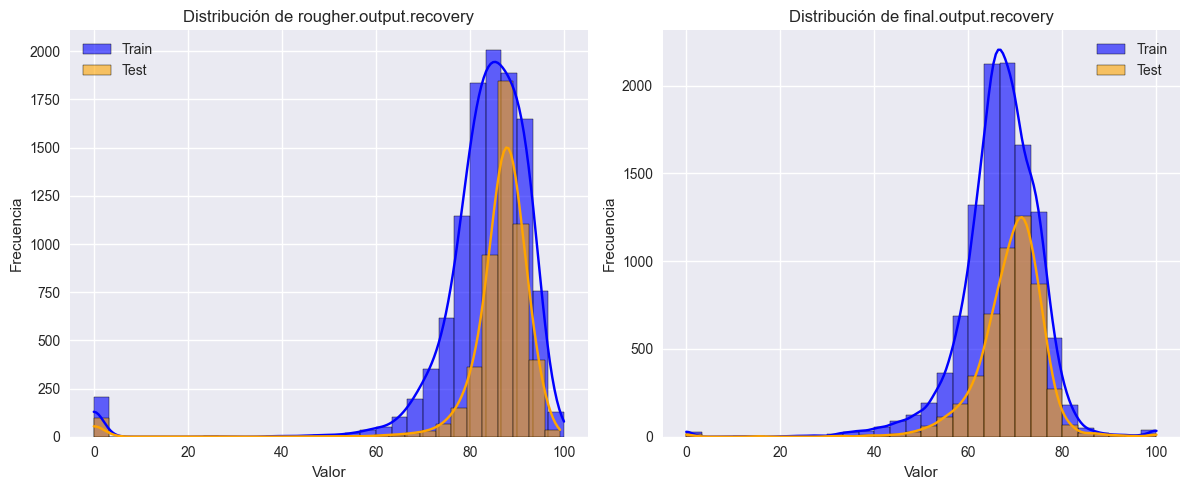

/var/folders/fc/95nklc_158l9ymg0nw6d3fqm0000gn/T/ipykernel_22458/2370362770.py:38: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[train['rougher.output.recovery'], test['rougher.output.recovery']],
/var/folders/fc/95nklc_158l9ymg0nw6d3fqm0000gn/T/ipykernel_22458/2370362770.py:45: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[train['final.output.recovery'], test['final.output.recovery']],


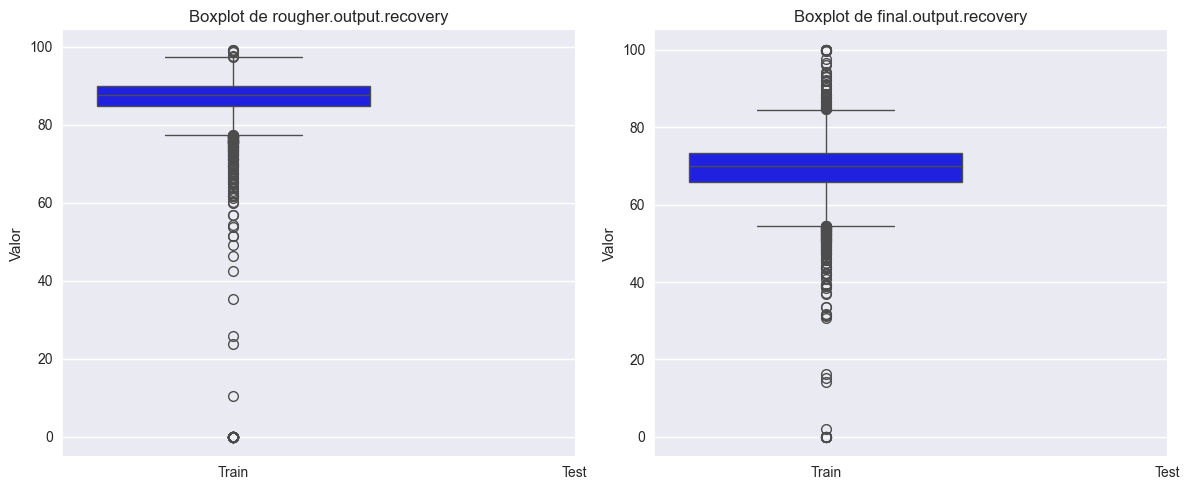

In [134]:

# Estadísticas descriptivas
print("Train - rougher.output.recovery:\n", train['rougher.output.recovery'].describe())
print("Test - rougher.output.recovery:\n", test['rougher.output.recovery'].describe())
print("Train - final.output.recovery:\n", train['final.output.recovery'].describe())
print("Test - final.output.recovery:\n", test['final.output.recovery'].describe())

# Configuramos el estilo de las gráficas
plt.style.use('seaborn-v0_8')  
sns.set_palette("husl")        

# 1. Histogramas para rougher.output.recovery
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train['rougher.output.recovery'], bins=30, kde=True, color='blue', label='Train', alpha=0.6)
sns.histplot(test['rougher.output.recovery'], bins=30, kde=True, color='orange', label='Test', alpha=0.6)
plt.title('Distribución de rougher.output.recovery')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

# 2. Histogramas para final.output.recovery
plt.subplot(1, 2, 2)
sns.histplot(train['final.output.recovery'], bins=30, kde=True, color='blue', label='Train', alpha=0.6)
sns.histplot(test['final.output.recovery'], bins=30, kde=True, color='orange', label='Test', alpha=0.6)
plt.title('Distribución de final.output.recovery')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Boxplots para comparar distribuciones
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=[train['rougher.output.recovery'], test['rougher.output.recovery']], 
            palette=['blue', 'orange'])
plt.xticks([0, 1], ['Train', 'Test'])
plt.title('Boxplot de rougher.output.recovery')
plt.ylabel('Valor')

plt.subplot(1, 2, 2)
sns.boxplot(data=[train['final.output.recovery'], test['final.output.recovery']], 
            palette=['blue', 'orange'])
plt.xticks([0, 1], ['Train', 'Test'])
plt.title('Boxplot de final.output.recovery')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()

### Análisis de las estadísticas descriptivas

#### Rougher.output.recovery

- La media en test (85.33) es mayor que en train (82.74), sugiriendo un desplazamiento hacia valores más altos
- La desviación estándar es ligeramente menor en test (12.92 vs 13.59), indicando menos dispersión
- La mediana también es mayor en test (87.50 vs 84.85), y el percentil 25% empieza más alto (84.80 vs 80.00), lo que refuerza que los valores en test tienden a ser más altos

#### Final.output.recovery

- La media en test (69.00) es mayor que en train (66.81), similar a lo visto en rougher
- La desviación estándar es menor en test (7.71 vs 8.82), indicando una distribución más compacta
- La mediana y los percentiles 25% y 75% son más altos en test, confirmando un desplazamiento hacia valores más altos

El sMAPE  mide el error relativo entre los valores reales y predichos. Este es sensible a las diferencias entre las distribuciones de los datos de entrenamiento y los datos de prueba


## Conclusión Final del Proyecto

El objetivo de este proyecto fue desarrollar un modelo predictivo para estimar la recuperación de oro (rougher.output.recovery y final.output.recovery) en un proceso de minería, utilizando datos históricos (train, test, y full) y evaluando el desempeño con la métrica sMAPE 

A lo largo del análisis, probamos modelos de Regresión Lineal, Arbol de Decisión y Random Forest, realizamos validación cruzada, y comparamos distribuciones entre los conjuntos de datos

Al final escogimos el modelo con el menor sMAPE (Regresión Lineal) en el dataset de entrenamiento, y usando este modelo hicimos la validación con el dataset de prueba

- Validación Cruzada (train): Obtuvo un sMAPE combinado de 1.84% (rougher: 2.96%, final: 1.47%), indicando un ajuste excelente dentro del conjunto de entrenamiento.

Para poder hacer la validación con el dataset de prueba (ya que no tenia variables objetivo) alineamos train y test usando 41 columnas comunes de entrada (input) y estado (state), eliminando valores ausentes y estandarizando las predictoras para asegurar consistencia

- Prueba (test): El sMAPE combinado aumentó significativamente a 8.42% (rougher: 10.00%, final: 7.89%), mostrando una notable pérdida de generalización.

Si detallamos las distribuciones de las variables objetivo, Rougher.output.recovery y final.output.recovery en test tienen medias, medianas y percentiles más altos, con menor dispersión, lo que sugiere un proceso de recuperación más eficiente o condiciones distintas en test. Este desplazamiento explica la dificultad del modelo para generalizar desde train a test


#### Conclusión General

El proyecto logró construir y evaluar modelos predictivos para la recuperación de oro, destacando la Regresión Lineal como una solución efectiva dentro del conjunto de entrenamiento (sMAPE 1.84%). Sin embargo, su desempeño en test (sMAPE 8.42%) evidenció limitaciones en la generalización debido a diferencias en las distribuciones entre train y test. Estas diferencias, caracterizadas por valores más altos y menor dispersión en test, sugieren que el modelo lineal no capturó adecuadamente las condiciones cambiantes del proceso.

El proyecto cumplió con el objetivo de predecir la recuperación de oro, pero resaltó la importancia de considerar la generalización del modelo frente a datos nuevos. La Regresión Lineal es un buen punto de partida por su simplicidad y bajo sMAPE en train, pero para un despliegue práctico, un ajuste adicional de datos podrían ser necesarios para lograr un sMAPE más bajo y estable en test. Este análisis proporciona una base sólida para futuras iteraciones y optimizaciones en el proceso de minería

